## Menggunakan MLP

link colab metode mlp

https://colab.research.google.com/drive/1EAtRrEzUkleUsOVRvZLYHu2It_QY-WEQ?usp=sharing

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import argparse
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/aljovanmp518/Face_dataset
!cp -r Face_dataset/. .

fatal: destination path 'Face_dataset' already exists and is not an empty directory.


Found 5775 files belonging to 2 classes.


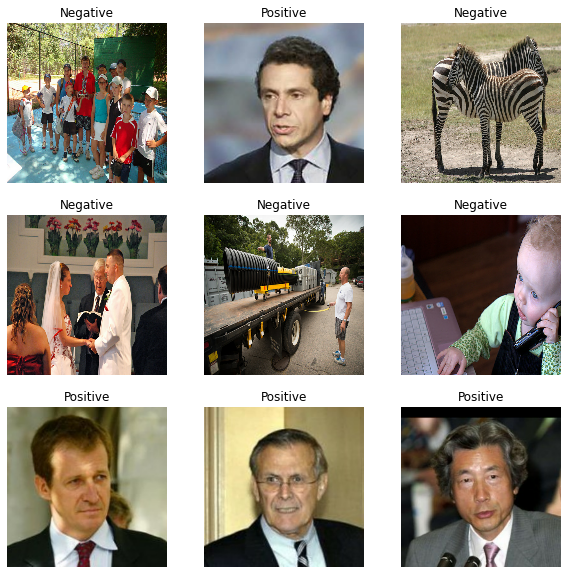

In [ ]:
path = '/content/Face_dataset/face'
dataset = image_dataset_from_directory(path,shuffle=True,batch_size=32,image_size=(160,160))

class_names = dataset.class_names

plt.figure(figsize=(10,10))
for images, labels in dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
args = "mlp"

# define the dictionary of models our script can use, where the key
# to the dictionary is the name of the model (supplied via command
# line argument) and the value is the model itself
models = {
	"knn": KNeighborsClassifier(n_neighbors=1),
	"naive_bayes": GaussianNB(),
	"logit": LogisticRegression(solver="lbfgs", multi_class="auto"),
	"svm": SVC(kernel="linear"),
	"decision_tree": DecisionTreeClassifier(),
	"random_forest": RandomForestClassifier(n_estimators=100),
	"mlp": MLPClassifier()
}

In [ ]:
print("[INFO] extracting image features...")
imagePaths = paths.list_images(path)
data = []
labels = []

[INFO] extracting image features...


In [ ]:
def extract_color_stats(image):
	# split the input image into its respective RGB color channels
	# and then create a feature vector with 6 values: the mean and
	# standard deviation for each of the 3 channels, respectively
	(R, G, B) = image.split()
	features = [np.mean(R), np.mean(G), np.mean(B), np.std(R),
		np.std(G), np.std(B)]

	# return our set of features
	return features

In [ ]:
for imagePath in imagePaths:
	# load the input image from disk, compute color channel
	# statistics, and then update our data list
	image = Image.open(imagePath)
	features = extract_color_stats(image)
	data.append(features)

	# extract the class label from the file path and update the="path to directory containing the '3scenes' dataset")
  #args = vars(ap.parse_args())
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

# encode the labels, converting them from strings to integers
le = LabelEncoder()
labels = le.fit_transform(labels)

# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25)




# train the model
print("[INFO] using '{}' model".format(args))
model = models[args]
model.fit(trainX, trainY)

# make predictions on our data and show a classification report
predictions = model.predict(testX)
print(classification_report(testY, predictions))

[INFO] using 'mlp' model
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       679
           1       0.80      0.76      0.78       765

    accuracy                           0.77      1444
   macro avg       0.77      0.77      0.77      1444
weighted avg       0.77      0.77      0.77      1444

